# ITS70604 Assignment 03

In [ ]:
# import libraries
import os
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
path = os.getcwd()

## Data Assessment

In [ ]:
if '/content' in path:
    from google.colab import drive
    drive.mount('/content/drive')
    df = pd.read_csv('/content/drive/MyDrive/[Taylors] Masters of Applied Computing/ITS70604 Data Analytics and ML/Assignment3/hotel_bookings.csv')
else:
    df = pd.read_csv('hotel_bookings.csv')
    
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<font color='goldenrod'>The variable `company` contains mainly null values and should be dropped. The variable `is_canceled` is most likely our target variable that will be used to predict booking cancellations. </font>

In [ ]:
df['is_canceled'].unique()

array([0, 1], dtype=int64)

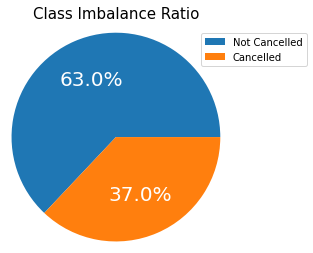

In [ ]:
# show data imbalance
data = df['is_canceled'].value_counts()
plt.pie(data,
        autopct='%0.1f%%',
        textprops={'color':'white','size':20},
        radius=1.2)

plt.title("Class Imbalance Ratio",fontsize=15, pad=10)
plt.legend(labels=['Not Cancelled','Cancelled'],loc=1,bbox_to_anchor=(1.4,1))
plt.savefig("class_imbalance_ratio_piechart.png")

In [ ]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

<font color='goldenrod'>The target variable `is_canceled` is binary and has a good imbalance ratio for classification that does not require the dataset to be balanced.</font>

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Data Cleaning

In [ ]:
def clean_data(df):
    # Replace missing values:
    # agent: If no agency is given, booking was most likely made without one.
    # company: If none given, it was most likely private.
    # rest schould be self-explanatory.
    nan_replacements = {"children": 0.0,"country": "Unknown", "agent": 0, "company": 0}
    df = df.fillna(nan_replacements)
    
    # "meal" contains values "Undefined", which is equal to SC.
    df["meal"].replace("Undefined", "SC", inplace=True)
    
    # Some rows contain entreis with 0 adults, 0 children and 0 babies. 
    # I'm dropping these entries with no guests.
    zero_guests = list(df.loc[df["adults"]
                       + df["children"]
                       + df["babies"]==0].index)
    df.drop(df.index[zero_guests], inplace=True)
    
    return df

# clean the data
df = clean_data(df)

In [ ]:
print(f'The shape of the dataframe is {df.shape}')
print(f'There is {df.isnull().sum().sum()} null values.')

The shape of the dataframe is (119210, 32)
There is 0 null values.


### Numerical Variables

In [ ]:
# create a dataframe of all the numerical variables
num_var = [col for col in df.columns if df[col].dtypes != 'object']
df_num = df[num_var].copy()
df_num.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0,0.0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0,0.0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,0,75.0,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,0,75.0,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,0,98.0,0,1


<font color='goldenrod'>The numerical category is normalized in order to obtain non-negative scaled values </font>

In [ ]:
# normalize the dataset
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
np_num = sc.fit_transform(df_num)
df_num_norm = pd.DataFrame(np_num,columns=df_num.columns)

df_num_norm.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0.0,0.464043,0.0,0.5,0.0,0.0,0.00,0.036364,0.0,0.0,0.0,0.0,0.0,0.166667,0.000000,0.0,0.0,0.001180,0.0,0.0
1,0.0,1.000000,0.0,0.5,0.0,0.0,0.00,0.036364,0.0,0.0,0.0,0.0,0.0,0.222222,0.000000,0.0,0.0,0.001180,0.0,0.0
2,0.0,0.009498,0.0,0.5,0.0,0.0,0.02,0.018182,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.015053,0.0,0.0
3,0.0,0.017639,0.0,0.5,0.0,0.0,0.02,0.018182,0.0,0.0,0.0,0.0,0.0,0.000000,0.568224,0.0,0.0,0.015053,0.0,0.0
4,0.0,0.018996,0.0,0.5,0.0,0.0,0.04,0.036364,0.0,0.0,0.0,0.0,0.0,0.000000,0.448598,0.0,0.0,0.019307,0.0,0.2


### Categorical Variables

In [ ]:
# create a df of categorical variables
cat_var = [col for col in df.columns if df[col].dtypes == 'object']
df_cat = df[cat_var].copy()
df_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03


<font color='goldenrod'>The categorical variables are label encoded as shown below. The map function is used instead of other encoding libraries for ease of readability and information transparency.

In [ ]:
# print out unique categorical values
for col in df_cat.columns:
    print(f"{col}: \n{df_cat[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

arrival_date_month: 
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

meal: 
['BB' 'FB' 'HB' 'SC']

country: 
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'Unknown' 'ROU' 'NOR' 'OMN' 'ARG'
 'POL' 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS'
 'EST' 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX'
 'MAR' 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF'
 'AGO' 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN'
 'JAM' 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL'
 'GGY' 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL'
 'SEN' 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA'
 'CUB' 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP'
 'BDI' 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL'
 'UZB' 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH

In [ ]:
# encoding the categorical variables

df_cat['hotel'] = df_cat['hotel'].map({'Resort Hotel' : 0, 
                                       'City Hotel' : 1
                                      })

df_cat['meal'] = df_cat['meal'].map({'BB' : 0, 
                                     'FB': 1, 
                                     'HB': 2, 
                                     'SC': 3, 
                                     'Undefined': 4
                                    })

df_cat['market_segment'] = df_cat['market_segment'].map({'Direct': 0, 
                                                         'Corporate': 1, 
                                                         'Online TA': 2, 
                                                         'Offline TA/TO': 3,
                                                         'Complementary': 4, 
                                                         'Groups': 5, 
                                                         'Undefined': 6, 
                                                         'Aviation': 7
                                                        })

df_cat['distribution_channel'] = df_cat['distribution_channel'].map({'Direct': 0, 
                                                                     'Corporate': 1, 
                                                                     'TA/TO': 2, 
                                                                     'Undefined': 3,
                                                                     'GDS': 4
                                                                    })

df_cat['reserved_room_type'] = df_cat['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 
                                                                 'E': 3, 'G': 4, 'F': 5, 
                                                                 'H': 6, 'L': 7, 'B': 8
                                                                })

df_cat['deposit_type'] = df_cat['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

df_cat['customer_type'] = df_cat['customer_type'].map({'Transient': 0, 
                                                       'Contract': 1, 
                                                       'Transient-Party': 2, 
                                                       'Group': 3
                                                      })

# display results
df_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,0,July,0,PRT,0,0,0,C,0,0,Check-Out,2015-07-01
1,0,July,0,PRT,0,0,0,C,0,0,Check-Out,2015-07-01
2,0,July,0,GBR,0,0,1,C,0,0,Check-Out,2015-07-02
3,0,July,0,GBR,1,1,1,A,0,0,Check-Out,2015-07-02
4,0,July,0,GBR,2,2,1,A,0,0,Check-Out,2015-07-03


## Feature Selection

<font color='goldenrod'>There are currently 31 features available for the dataset, not all of which are applicable for the purpose of this study. This paper aims to create an application that would allow hoteliers to predict booking cancellations. Thus, post-booking information such as `reservation_status`, `reservation_status_date`, and etc. are not applicable. These features are know as a data leak, whihc are variables that is not readily available upon initial booking. Therefore the first step is then to remove any variables that is possibly a data leak.

### Feature Exclusion

<font color='goldenrod'>The variables that will be removed are jotted down on the table below along with the justification for removing them</font>

| Variable | Justification |
|:--------:|---------------|
|`arrival_date_year`        | This variable is too generic.|
|`arrival_date_month`       | This variable is too generic.|
|`arrival_date_week_number` | This variable is too generic.|
|`arrival_date_day_of_month`| This variable is too generic.|
|`stays_in_weekend_nights`  | This variable is too generic.|
|`stays_in_week_nights`     | This variable is too generic.|
|`country`                  | This variable is protected.  |
|`assigned_room_type`       | This variable is a data leak.|
|`reservation_status`       | This variable is a data leak.|
|`reservation_status_date`  | This variable is a data leak.|


In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
irrelevant_features = [
    'arrival_date_year',
    'arrival_date_month',
    'arrival_date_week_number',
    'arrival_date_day_of_month',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'country',
    'assigned_room_type',
    'reservation_status',
    'reservation_status_date'
]

# drop the columns for both dataframes
for ft in irrelevant_features:
    if ft in df_num.columns:
        df_num.drop(columns=ft, inplace=True)
    else:
        df_cat.drop(columns=ft, inplace=True)

print(f"The dataframe df_num has the following {df_num.shape[1]} variables \n", df_num.columns, end='\n')
print(f"The dataframe df_cat has the following {df_cat.shape[1]} variables \n", df_cat.columns, end='\n')

The dataframe df_num has the following 15 variables 
 Index(['is_canceled', 'lead_time', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')
The dataframe df_cat has the following 7 variables 
 Index(['hotel', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'deposit_type', 'customer_type'],
      dtype='object')


<font color='goldenrod'>The dataframe for the numerical variables contains 15 features while the categorical one contains only 7 features after the exclusion process. The next step is to calculate the correlation coefficient for the continuous variables. This is done to understant how the numerical variables correlate to the target variables.</font>

In [ ]:
pd.DataFrame(x_norm, columns=ft_select).head()

,deposit_type,lead_time,adr,total_of_special_requests,previous_cancellations,market_segment,agent,customer_type
0,-0.374708,2.225879,-2.021841,-0.720802,-0.103195,-1.736750,-0.698798,-0.561625
1,-0.374708,5.921785,-2.021841,-0.720802,-0.103195,-1.736750,-0.698798,-0.561625
2,-0.374708,-0.908624,-0.534742,-0.720802,-0.103195,-1.736750,-0.698798,-0.561625
3,-0.374708,-0.852484,-0.534742,-0.720802,-0.103195,-1.032942,2.137858,-0.561625
4,-0.374708,-0.843127,-0.078699,0.540435,-0.103195,-0.329133,1.540667,-0.561625


### Pearson's Correlation

In [ ]:
df_corr = df.corr(method='pearson')["is_canceled"]
df_corr_rank = df_corr.abs().sort_values(ascending=False)[1:]
df_corr_rank

lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

<font color='goldenrod'>Pearsons correlation was conducted on the numerical variables in order to determine the best performing predictors. From the results obtained, only **FIVE** variables scored an R value above 0.1 and a correlation matrix of those FIVE variable is plotted below in order to determine the direction of correlation.</font>

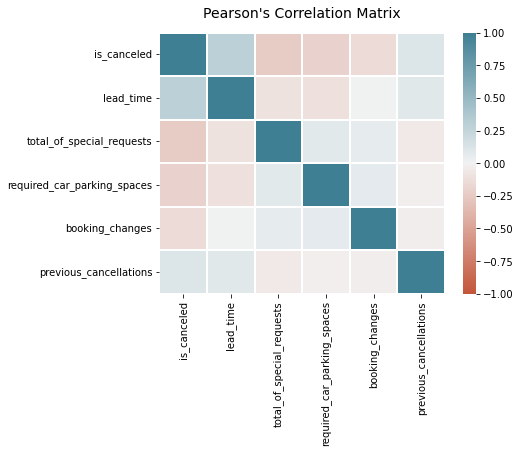

In [ ]:
def corr_matrix(df,method='pearson',annot=False,figsize=(6.4,4.8)):
    # create the axes
    fig, ax = plt.subplots(figsize=figsize)
    cmap = sns.diverging_palette(20, 220, as_cmap=True)
    # matrix dataframe
    df_matrix = df.corr(method=method)
    # plot heat map
    sns.heatmap(df_matrix,linewidth=0.1, annot=annot,
                fmt='0.2f', vmin=-1,vmax=1,cmap=cmap,ax=ax)
    plt.title(f"{method.capitalize()}'s Correlation Matrix",fontsize=14,pad=15)
    plt.show()

    return

feature = ['is_canceled'] + df_corr_rank[:5].index.to_list() 
corr_matrix(df[feature],method='pearson')

<font color='goldenrod'>The two variables `lead_time` and `previous_cancellations` has a positive correlation, whereas the variables `total_of_special_requests`, `required_Car_parking_spaces`, and `booking_changes` have a negative correlation.

### SelectKBest

<font color='goldenrod'>The Pearson's correlation method's weakness is that it is only able to determine the linear correlation between two variables. Thus to reinforce the findings from the Pearson's R method above, the SelectKBest method will be used to determine the best performing features using the Chi Square statistical hypothesis test.</font> 

In [ ]:
data

,lead_time,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,...,adr,required_car_parking_spaces,total_of_special_requests,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
0,342,2,0.0,0,0,0,0,3,0.0,0.0,...,0.00,0,0,0,0,0,0,0,0,0
1,737,2,0.0,0,0,0,0,4,0.0,0.0,...,0.00,0,0,0,0,0,0,0,0,0
2,7,1,0.0,0,0,0,0,0,0.0,0.0,...,75.00,0,0,0,0,0,0,1,0,0
3,13,1,0.0,0,0,0,0,0,304.0,0.0,...,75.00,0,0,0,0,1,1,1,0,0
4,14,2,0.0,0,0,0,0,0,240.0,0.0,...,98.00,0,1,0,0,2,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2,0.0,0,0,0,0,0,394.0,0.0,...,96.14,0,0,1,0,3,2,1,0,0
119386,102,3,0.0,0,0,0,0,0,9.0,0.0,...,225.43,0,2,1,0,2,2,3,0,0
119387,34,2,0.0,0,0,0,0,0,9.0,0.0,...,157.71,0,4,1,0,2,2,2,0,0
119388,109,2,0.0,0,0,0,0,0,89.0,0.0,...,104.40,0,0,1,0,2,2,1,0,0


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

def feature_chi2(x,y,k='all'):
    # select k best features
    ft_select = SelectKBest(chi2, k=k).fit(x, y)
    # get information
    ft_name = ft_select.get_feature_names_out()
    ft_score = ft_select.scores_
    # generate a ranked series
    ft_dict = {col:score for col, score in zip(ft_name,ft_score)}
    # create a ranked Pandas Series
    ft_rank = pd.Series(ft_dict).sort_values(ascending=False)
    
    return ft_rank

# define feature and target variables
x = df_num_norm.iloc[:,1:]
y = df_num_norm['is_canceled']

chi2_test_rank = pd.DataFrame(feature_chi2(x, y, k='all'), columns=['Score'])
chi2_test_rank.style.background_gradient(cmap=sns.diverging_palette(20, 220, as_cmap=True))

,Score
lead_time,1522.210786
total_of_special_requests,1446.808808
is_repeated_guest,809.720588
required_car_parking_spaces,549.239350
previous_cancellations,455.385712
company,414.087231
booking_changes,258.848700
days_in_waiting_list,119.940531
previous_bookings_not_canceled,89.198589
agent,74.749589


<font color='goldenrod'>Comparing the two results from the test seems to support some similar findings from the Pearson's test. Of the top 5 best ranked feature from the SeleckKBest method, four variables are similarly present in both test;</font>
- `lead_time`
- `total_of_special_requests`
- `required_car_parking_spaces`
- `previous_cancellations`

### Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# define the target variables
x = pd.concat([df_num,df_cat], axis=1).iloc[:,1:]
y = df_num['is_canceled']

def feature_importance(x,y):
    # train model
    model = RandomForestClassifier(n_estimators=150)
    model.fit(x, y)
    # create ranked feature importance dataframe
    df_features = pd.DataFrame(columns=['Feature','Feature Importance'])
    df_features['Feature'] = model.feature_names_in_
    df_features['Feature Importance'] = model.feature_importances_
    df_features_ranked = df_features.sort_values(by='Feature Importance',ascending=False).reset_index(drop=True)
    
    return df_features_ranked

df_ft_rank = feature_importance(x,y)

# display the results
df_ft_rank.style.background_gradient(cmap=sns.diverging_palette(20, 220, as_cmap=True))

,Feature,Feature Importance
0,lead_time,0.262794
1,adr,0.195138
2,deposit_type,0.138249
3,agent,0.067221
4,total_of_special_requests,0.063135
5,market_segment,0.044700
6,previous_cancellations,0.043960
7,customer_type,0.034305
8,booking_changes,0.025473
9,required_car_parking_spaces,0.023755


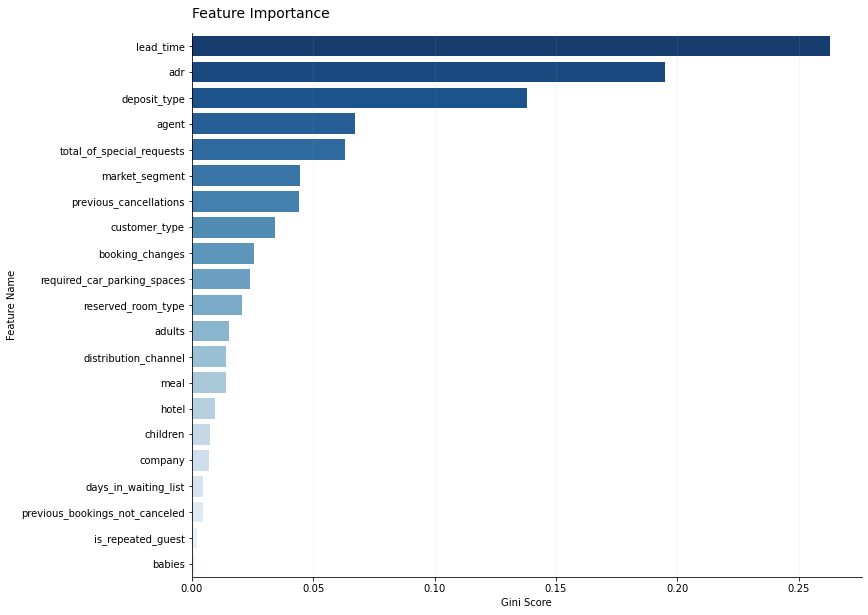

<font color='goldenrod'>`lead_time`, `adr`, and `deposit_type` seems to be the 3 most important features, collectively they accounts for 60% of the weight in determining the predicted outcome.  

### Selected Features

<font color='goldenrod'>The objective of this project is to create an app that allows hotelier to see the probability of a booking being cancelled based on intial booking informations. As such the variables that the hotelier will have to input must coincide with information that they would have at the moment a reservation is made. Also, requiring the user to input too much information is not desirable and makes the app unintuitive. As such, the following feature are the most viable options;

- `deposit_type`
- `lead_time`
- `adr`
- `total_of_special_requests`
- `previous_cancellations`
- `market_segment`
- `agent` - *this could refer to agent code*
- `customer_type`

In [ ]:
# list of features selected for training
ft_select = [
    'deposit_type',
    'lead_time',
    'adr',
    'total_of_special_requests',
    'previous_cancellations',
    'market_segment',
    'agent',
    'customer_type'
]

## Model Selection

### Data Preperation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# define the variables
data = pd.concat([df_num,df_cat], axis=1).iloc[:,1:]
x = data[ft_select]
x_norm = StandardScaler().fit_transform(x)
y = df_num['is_canceled']

# split the dataset
x_train, x_test, y_train, y_test = train_test_split(x_norm,y,test_size=0.2,random_state=42)

# print train and test size
print("The training data has : {0:,} rows | {1} columns".format(x_train.shape[0],x_train.shape[1]))
print("The testing data has  : {0:,} rows | {1} columns".format(x_test.shape[0],x_test.shape[1]))

The training data has : 95,368 rows | 8 columns
The testing data has  : 23,842 rows | 8 columns


### Model Comparison

In [ ]:
# import classifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# import evaluation metric
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score

In [ ]:
# define models to test:
base_models = [("SVM_model", SVC(random_state=42)),
               ("RF_model", RandomForestClassifier(random_state=42,n_jobs=-1)),
               ("LR_model", LogisticRegression(random_state=42,n_jobs=-1)),
               ("XGB_model", XGBClassifier(random_state=42, n_jobs=-1))]

def model_comparison(base_models,scoring='balanced_accuracy'):
    '''
    This function evaluates n number of models based on the user defined performance metric.
    '''
    print(f'Starting process at {time.ctime()}')
    print('---------------------------------------------------------------------------------')
    start_time = time.time()
    
    # Preprocessing, fitting, making predictions and scoring for every model:
    for name, model in base_models:
        # get cross validation score for each model:
        cv_results = cross_val_score(model, x_train, y_train, 
                                     cv=5, scoring=scoring,
                                     n_jobs=-1)
        # output:
        min_score = round(min(cv_results), 4)
        max_score = round(max(cv_results), 4)
        mean_score = round(np.mean(cv_results), 4)
        std_dev = round(np.std(cv_results), 4)
        print(f"{name} balanced accuracy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")
    
    end_time = time.time()
    total_time = start_time - end_time
    
    print('---------------------------------------------------------------------------------')
    print(f'The process ended at {time.ctime()}')
    print(f'The process took {total_time:0.2f} seconds to complete')
    
    return

model_comparison(base_models)

Staring process at Tue Jun 28 13:16:28 2022
---------------------------------------------------------------------------------
SVM_model balanced accuracy score: 0.7607 +/- 0.0036 (std) min: 0.7562, max: 0.7654
RF_model balanced accuracy score: 0.8132 +/- 0.0038 (std) min: 0.809, max: 0.8186
LR_model balanced accuracy score: 0.7058 +/- 0.0038 (std) min: 0.7013, max: 0.7105
XGB_model balanced accuracy score: 0.8012 +/- 0.004 (std) min: 0.7939, max: 0.8053
---------------------------------------------------------------------------------
The process ended at Tue Jun 28 13:22:42 2022
The process took -373.40 seconds to complete


<font color='goldenrod'>**CONCLUSION**: The Random Forest algorithm is the best performing model. In the next section we will train, tune and and evaluate the random forest model.</font>

### Model Tuning

#### Logistic Regression - Option 1

In [ ]:
# sampling the data
x_sample = data.sample(10000)
x_sample_norm = StandardScaler().fit_transform(x_sample)
y_sample = df.loc[x_sample.index,'is_canceled']

In [ ]:
## LOGISTIC REGRESSION
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import loguniform

LR_model = LogisticRegression()
params = {
    'C': loguniform(1e-5, 100),
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
}

LR_tuned = RandomizedSearchCV(estimator = LR_model, 
                              param_distributions = params, 
                              n_iter = 100, 
                              verbose=2, 
                              cv = 5,  
                              random_state=42, 
                              n_jobs = -1)

# Fit the random search model
LR_tuned.fit(x_sample_norm, y_sample)

# print the best parameters
print(LR_tuned.best_params_)
print(f"This best score is : {LR_tuned.best_score_}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'C': 76.31610566529858, 'solver': 'newton-cg'}
This best score is : 0.7863000000000001


#### Random Forest - Option 2

In [ ]:
# tune hyperparameter of model

RF_model = RandomForestClassifier()
params = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

RF_tuned = RandomizedSearchCV(estimator = RF_model, 
                              param_distributions = params, 
                              n_iter = 100, 
                              cv = 5, verbose=2, 
                              random_state=42, n_jobs = -1)

# Fit the random search model
RF_tuned.fit(x_sample, y_sample)

# print the best parameters
print(RF_tuned.best_params_)
print(f"This best score is : {RF_tuned.best_score_}")

In [ ]:
RF_tuned.best_score_

Results from the RandomSearchCV for the best Random Forest parameters are;
```
{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}
 
 This model performed with an accuracy of 91.4%
```

In [ ]:
# generate the best performing model
RF_model = RandomForestClassifier(
    n_estimators=800,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=70,
    bootstrap=False)

# train the model
RF_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=70, max_features='sqrt',
                       n_estimators=800)

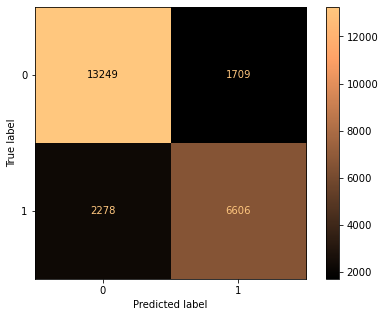

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     14958
           1       0.79      0.74      0.77      8884

    accuracy                           0.83     23842
   macro avg       0.82      0.81      0.82     23842
weighted avg       0.83      0.83      0.83     23842

The balanced accuracy is 81.47%


In [ ]:
# evaluate the model
y_pred = RF_model.predict(x_test)

fig, ax0 = plt.subplots(figsize=(7,5))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,
                                        cmap='copper',
                                        ax=ax0)
plt.show()
print(classification_report(y_test,y_pred))
print(f'The balanced accuracy is {balanced_accuracy_score(y_test,y_pred):0.2%}')

## Model Evaluation

In [ ]:
## Train the model
LR_model = LogisticRegression(C=76.3161, solver='newton-cg', max_iter=500)
LR_model.fit(x_train,y_train)

LogisticRegression(C=76.3161, max_iter=500, solver='newton-cg')

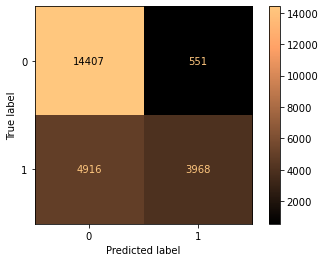

              precision    recall  f1-score   support

           0       0.75      0.96      0.84     14958
           1       0.88      0.45      0.59      8884

    accuracy                           0.77     23842
   macro avg       0.81      0.70      0.72     23842
weighted avg       0.79      0.77      0.75     23842

The balanced accuracy is 70.49%


In [ ]:
## Evaluate the model
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, balanced_accuracy_score

y_pred = LR_model.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap='copper')

plt.show()

print(classification_report(y_test,y_pred))
print(f'The balanced accuracy is {balanced_accuracy_score(y_test,y_pred):0.2%}')

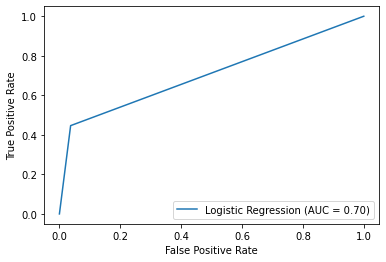

0.7049045898228381


In [ ]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                          estimator_name='Logistic Regression')
display.plot()

plt.show()

print(roc_auc)

<font color='goldenrod'>One of the advantage of using Logistic Regression over Random Forest is that LR is able to provide the probability value for it prediction. This can be displayed by the app and gives the user a more interpretable information. The hotelier can decide on the action that can be taken based on the probability rather than a binary YES/NO information. The caveat however is that the LR model has a low recall compared to the Random Forest. <br>However, it is more important the model has higher precision as the risk of a higher rate of False Positive outweighs that of False Negative.

## Deployment

In [ ]:
# store the model in joblib file
from joblib import load, dump

# train the model
LR_model.fit(x_norm,y)
# store model
dump(LR_model, 'hotel_app_logistic_regression_model.joblib')

['hotel_app_logistic_regression_model.joblib']

In [ ]:
# export cleaned features
x.to_csv('cleaned_features.csv')

In [ ]:
x_train[0]

array([-0.37470841,  2.63757444, -1.05026979, -0.72080191, -0.10319464,
        1.78229333, -0.69879791,  1.83077355])

<font color='goldenrod'>The following section involves developing the app on Streamlit. For more information please refer to the Python file *hotel_app.py*